In [2]:
import pandas as pd
import numpy as np

# Anahat

- Pandas nedir?
- Temel veri yapilari
    - Seri
    - Dataframe
- Veriyi elde etme
    - Diskten/agdan/veritabanindan okuma
    - Olusturma
- Secme
    - Kolon(lar) secme
    - Indeks bazli secim
    - Bastan/sondan secme
    - Ornekleme
- Filtreleme
    - Sartli filtreleme
    - Satir/sutun dusurme
- Siralama
    - Cok kolonlu siralama
- Veri analizi
    - Ozetleme
    - Plotlama
    - Tekrar eden degerler
    - Kayip degerler
- Manipulasyon
    - Islemler
    - Kolon/satir ekleme
    - Kosullu atama (where)
- Birlestirme
    - Basit birlestirme (konkatenasyon(?))
    - Anahtar bazli birlestirme: **join**
        - Join tipleri
- Gruplama
    - Standart ozetleme fonksiyonlari
    - Ozellestirilmis grup fonksiyonlari
    - Pencere fonksiyonlari (window functions)
- Pivot/eritme
- Zaman dizisi islemleri (timeseries operations)
    - Pencere fonksiyonlari (moving average vs.)
    - Yeniden ornekleme (resample)
    - Bosluk doldurma
- Coklu indeks ve dilimleme ile kolay secim
- Diske/veritabanina yazma

         

        


## 1. Pandas nedir?

Dataframe(tablo) merkezliVeri analizi/manipulasyon

## 2. Pandas'da temel veri yapilari

### 2.a `Series`

In [2]:
pd.Series([1,2,3,4], index=['a', 'b', 'c', 'd'])

a    1
b    2
c    3
d    4
dtype: int64

In [3]:
pd.Series([1,2,3,4])

0    1
1    2
2    3
3    4
dtype: int64

In [4]:
s = pd.Series([1,2,3,4])
s.shape

(4,)

### 2.b `DataFrame`

In [5]:
?pd.DataFrame

In [6]:
df = pd.DataFrame({'a': [1,2,3,4], "b": [4,5,6,7]})
df

,a,b
0,1,4
1,2,5
2,3,6
3,4,7


In [7]:
df.shape

(4, 2)

## 3. Veriyi elde etme

### 3.a Okuma

#### 3.a.I `csv`

csv: comma separated values

```
HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
140463,14.0463,29.7,10,-1,Abington,Montgome
113033,11.3033,24.1,18,4,Ambler,Montgome
124186,12.4186,19.5,25,8,Aston,Delaware
```

In [8]:
dosyaadi = "Phily_Crime_Rate.csv"

crimerate = pd.read_csv(dosyaadi)

In [9]:
crimerate

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
...,...,...,...,...,...,...,...
94,174232,17.4232,13.8,25.0,4.7,Westtown,Chester
95,196515,19.6515,29.9,16.0,1.8,Whitemarsh,Montgome
96,232714,23.2714,9.9,21.0,0.2,Willistown,Chester
97,245920,24.5920,22.6,10.0,0.3,Wynnewood,Montgome


#### 3.a.II `json`

In [10]:
crimejson = pd.read_json("crime.json")

In [11]:
crimejson == crimerate

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...
94,True,True,True,True,True,True,True
95,True,True,True,True,True,True,True
96,True,True,True,True,True,True,True
97,True,True,True,True,False,True,True


In [12]:
crimejson

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
...,...,...,...,...,...,...,...
94,174232,17.4232,13.8,25.0,4.7,Westtown,Chester
95,196515,19.6515,29.9,16.0,1.8,Whitemarsh,Montgome
96,232714,23.2714,9.9,21.0,0.2,Willistown,Chester
97,245920,24.5920,22.6,10.0,0.3,Wynnewood,Montgome


#### 3.a.III `pickle`

In [13]:
import sys

In [14]:
sys.version

'3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]'

In [15]:
crimepickle = pd.read_pickle("crime.pickle")

In [16]:
crimepickle

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
...,...,...,...,...,...,...,...
94,174232,17.4232,13.8,25.0,4.7,Westtown,Chester
95,196515,19.6515,29.9,16.0,1.8,Whitemarsh,Montgome
96,232714,23.2714,9.9,21.0,0.2,Willistown,Chester
97,245920,24.5920,22.6,10.0,0.3,Wynnewood,Montgome


#### 3.a.IV `html`

In [17]:
url = "https://www.w3schools.com/html/html_tables.asp"

pd.read_html(url)[0]

,Company,Contact,Country
0,Alfreds Futterkiste,Maria Anders,Germany
1,Centro comercial Moctezuma,Francisco Chang,Mexico
2,Ernst Handel,Roland Mendel,Austria
3,Island Trading,Helen Bennett,UK
4,Laughing Bacchus Winecellars,Yoshi Tannamuri,Canada
5,Magazzini Alimentari Riuniti,Giovanni Rovelli,Italy


#### 3.a.V `sql`

In [18]:
?pd.read_sql

##### Baglanti olusturma

In [19]:
import sqlite3
conn = sqlite3.connect("mydb.db")

In [20]:
query = "SELECT * FROM products"

product= pd.read_sql(query, conn)

In [21]:
product

,CCID,price,cost
0,101,6.99,2.0
1,102,3.99,2.0
2,103,15.00,5.0
3,104,52.39,16.0
4,105,39.99,13.0
5,106,6.00,1.0
6,113,NaN,NaN


In [22]:
store = pd.read_sql("SELECT * FROM stores", conn)
store

,store,type
0,1,mall
1,2,DC
2,3,mall


### 3.b Olusturma

Bu bolumde, farkli bir python veri yapisindan pandas veri yapilarina gecisi ele alacagiz.

#### 3.b.I `Series`

In [23]:
liste = [1,2,3,4,5]

sliste = ["a", "b", "c", "p"]

karma_liste = ["a", 1, "b", 2]

sozluk = {'a': 1, "b": 2, "c": 3}

array = np.array([9, 1, 3, 4, 1, 1])
float_array = np.array([9., 1., 3., 4., 1., 1.])


In [24]:
pd.Series(liste)

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [25]:
pd.Series(sliste,)

0    a
1    b
2    c
3    p
dtype: object

In [26]:
s = pd.Series(karma_liste)
s

0    a
1    1
2    b
3    2
dtype: object

In [27]:
pd.Series([1, 2.])

0    1.0
1    2.0
dtype: float64

In [28]:
print(sozluk)
print(pd.Series(sozluk))

{'a': 1, 'b': 2, 'c': 3}
a    1
b    2
c    3
dtype: int64


In [29]:
array.dtype

dtype('int32')

In [30]:
pd.Series(array)

0    9
1    1
2    3
3    4
4    1
5    1
dtype: int32

In [31]:
pd.Series(array).dtype

dtype('int32')

In [32]:
pd.Series(float_array)

0    9.0
1    1.0
2    3.0
3    4.0
4    1.0
5    1.0
dtype: float64

In [33]:
float_array.dtype

dtype('float64')

In [34]:
pd.Series(float_array).dtype

dtype('float64')

#### 3.b.II `DataFrame`

##### Dict yontemi

In [35]:
?pd.DataFrame

```
| a | b | c
-------------
| 1 | 2 | 3
| 8 | 1 | 0
```

In [36]:
pd.DataFrame(
    data={
        "a": [1, 8],
        "b": [2, 1],
        "c": [3, 0]
        }
)

,a,b,c
0,1,2,3
1,8,1,0


```
    | a | b | c
    -------------
 k1 | 1 | 2 | 3
 k2 | 8 | 1 | 0
```

In [37]:
pd.DataFrame(
    data={
        "a": [1, 8],
        "b": [2, 1],
        "c": [3, 0]
        },
    index=["k1", "k2"]
)

,a,b,c
k1,1,2,3
k2,8,1,0


In [38]:
pd.DataFrame(
    data={
        "a": {
            "k1": 1, 
            "k2": 8
        },
        "b": {"k1": 2, "k2": 1},
        "c": {"k1": 3, "k2": 0}
        }
)

,a,b,c
k1,1,2,3
k2,8,1,0


##### Listeler listesi yontemi

In [39]:
data = [
    [1, 2, 3],
    [8, 1, 0]
    
]

In [40]:
data = [
    [1, 2, 3],
    [8, 1, 0]
]

pd.DataFrame(data=data, columns=['a', 'b', 'c'], index=['k1', 'k2'])

,a,b,c
k1,1,2,3
k2,8,1,0


In [41]:
array_2d = np.random.randint(0, 20, size=(8, 4))
array_2d

array([[16,  2,  8,  3],
       [ 2, 11, 19,  7],
       [19, 11,  4, 19],
       [13,  8, 19,  3],
       [12, 19,  5,  8],
       [ 5, 13,  8, 17],
       [17, 13,  2, 19],
       [13,  0,  2,  4]])

In [42]:
pd.DataFrame(array_2d)

,0,1,2,3
0,16,2,8,3
1,2,11,19,7
2,19,11,4,19
3,13,8,19,3
4,12,19,5,8
5,5,13,8,17
6,17,13,2,19
7,13,0,2,4


In [43]:
df = pd.DataFrame(array_2d, columns=['col1', 'col2', 'col3', 'col4'], index=range(10,18))
df

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
14,12,19,5,8
15,5,13,8,17
16,17,13,2,19
17,13,0,2,4


## 4. Secme

In [44]:
seri = pd.Series(array, index=['a', 0, 1, 2, 3, 4])

In [45]:
seri

a    9
0    1
1    3
2    4
3    1
4    1
dtype: int32

In [46]:
seri[0]

1

In [47]:
seri[4]

1

### 4.a Kolon/kolonlar secme

In [48]:
df

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
14,12,19,5,8
15,5,13,8,17
16,17,13,2,19
17,13,0,2,4


In [49]:
sozluk

{'a': 1, 'b': 2, 'c': 3}

In [50]:
sozluk['a']

1

In [51]:
secilecek_kolon = "col1"
df[  secilecek_kolon     ]

10    16
11     2
12    19
13    13
14    12
15     5
16    17
17    13
Name: col1, dtype: int32

In [52]:
type(df)

pandas.core.frame.DataFrame

In [53]:
type(df[  secilecek_kolon     ])

pandas.core.series.Series

##### Birden fazla kolon secimi

In [54]:
secilecek_kolon_listesi = ["col2", "col4"]
df[ secilecek_kolon_listesi  ]

,col2,col4
10,2,3
11,11,7
12,11,19
13,8,3
14,19,8
15,13,17
16,13,19
17,0,4


In [55]:
type(df[ secilecek_kolon_listesi  ])

pandas.core.frame.DataFrame

In [56]:
secilecek_kolon_listesi: list = ["col2","col1"]
df[ secilecek_kolon_listesi  ]

,col2,col1
10,2,16
11,11,2
12,11,19
13,8,13
14,19,12
15,13,5
16,13,17
17,0,13


In [57]:
type(df[ secilecek_kolon_listesi  ])

pandas.core.frame.DataFrame

### 4.b Indeks bazli secme

In [58]:
df

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
14,12,19,5,8
15,5,13,8,17
16,17,13,2,19
17,13,0,2,4


#### 4.b.I Indeks ismine gore secme: `loc`

##### col1, 13 isimli satiri secmek istiyoruz


In [59]:
df['col1'][13]

13

In [60]:
df.loc[13, "col1"]

13

In [61]:
array_2d

array([[16,  2,  8,  3],
       [ 2, 11, 19,  7],
       [19, 11,  4, 19],
       [13,  8, 19,  3],
       [12, 19,  5,  8],
       [ 5, 13,  8, 17],
       [17, 13,  2, 19],
       [13,  0,  2,  4]])

In [62]:
array_2d[3:5, 2]

array([19,  5])

In [63]:
df

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
14,12,19,5,8
15,5,13,8,17
16,17,13,2,19
17,13,0,2,4


In [64]:
array_2d[1:2, 2]

array([19])

In [65]:
df.loc[13:14, "col3"]

13    19
14     5
Name: col3, dtype: int32

In [66]:
df

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
14,12,19,5,8
15,5,13,8,17
16,17,13,2,19
17,13,0,2,4


In [67]:
df

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
14,12,19,5,8
15,5,13,8,17
16,17,13,2,19
17,13,0,2,4


In [68]:
df.loc[11, 'col1']

2

In [69]:

df.loc[14, 'col4']

8

In [70]:
# 14. satirin col3 ve col4 degerleri

```
df.loc[ 
    satir no/satir dilimi/satir isimleri listesi    ,
    kolon no/kolon dilimi/kolon isimleri listesi
]
```

In [71]:
df.loc[14,  ["col3", "col4"]  ]

col3    5
col4    8
Name: 14, dtype: int32

In [72]:
df.loc[[11, 15, 17],  ["col3"]  ]

,col3
11,19
15,8
17,2


In [73]:
df.loc[[11, 15, 17],  "col3"  ]

11    19
15     8
17     2
Name: col3, dtype: int32

In [74]:
df['col3']
df[ ['col3']   ]

,col3
10,8
11,19
12,4
13,19
14,5
15,8
16,2
17,2


In [75]:
df

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
14,12,19,5,8
15,5,13,8,17
16,17,13,2,19
17,13,0,2,4


In [76]:
liste[0:3]

[1, 2, 3]

In [77]:
df.loc[11:14, :]

,col1,col2,col3,col4
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
14,12,19,5,8


In [78]:
list('abcdefgh')

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

In [79]:
df_harfli = df.copy()
df_harfli.index = list('abcdefgh')
df_harfli

,col1,col2,col3,col4
a,16,2,8,3
b,2,11,19,7
c,19,11,4,19
d,13,8,19,3
e,12,19,5,8
f,5,13,8,17
g,17,13,2,19
h,13,0,2,4


In [80]:
df_harfli.loc["b":"f", "col2":"col4"]

,col2,col3,col4
b,11,19,7
c,11,4,19
d,8,19,3
e,19,5,8
f,13,8,17


#### 4.b.II Indeks sira numarasina gore secme: `iloc`

In [81]:
df

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
14,12,19,5,8
15,5,13,8,17
16,17,13,2,19
17,13,0,2,4


In [82]:
df.loc[12, 'col2']

11

In [83]:
df.iloc[2, 1]

11

In [84]:
df.iloc[2:5, 1:3]

,col2,col3
12,11,4
13,8,19
14,19,5


In [85]:
df.iloc[2:5, [1, 3]]

,col2,col4
12,11,19
13,8,3
14,19,8


In [86]:
df.iloc[::2, ::-1]

,col4,col3,col2,col1
10,3,8,2,16
12,19,4,11,19
14,8,5,19,12
16,19,2,13,17


In [87]:
df.iloc[2, 1]

11

In [88]:
df.iloc[:, -1]

10     3
11     7
12    19
13     3
14     8
15    17
16    19
17     4
Name: col4, dtype: int32

In [89]:
df.iloc[::2, ::-1]

,col4,col3,col2,col1
10,3,8,2,16
12,19,4,11,19
14,8,5,19,12
16,19,2,13,17


##### Seriler

In [90]:
seri

a    9
0    1
1    3
2    4
3    1
4    1
dtype: int32

In [91]:
seri.loc[2: 4]

2    4
3    1
4    1
dtype: int32

In [92]:
seri.iloc[2:4]

1    3
2    4
dtype: int32

In [93]:
seri.iloc[1::2]

0    1
2    4
4    1
dtype: int32

### 4.c Bastan/sondan secme

In [94]:
df.head()

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
14,12,19,5,8


In [95]:
df.head(2, )

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7


In [96]:
df.tail()

,col1,col2,col3,col4
13,13,8,19,3
14,12,19,5,8
15,5,13,8,17
16,17,13,2,19
17,13,0,2,4


In [97]:
df.tail(1)

,col1,col2,col3,col4
17,13,0,2,4


In [98]:
df.tail(0)

,col1,col2,col3,col4


### 4.d. Ornekleme: `sample`

In [99]:
df.sample()

,col1,col2,col3,col4
11,2,11,19,7


In [100]:
df.sample(3, )

,col1,col2,col3,col4
10,16,2,8,3
14,12,19,5,8
13,13,8,19,3


In [101]:
df.shape

(8, 4)

In [102]:
df.sample(df.shape[0])

,col1,col2,col3,col4
13,13,8,19,3
16,17,13,2,19
11,2,11,19,7
10,16,2,8,3
12,19,11,4,19
14,12,19,5,8
15,5,13,8,17
17,13,0,2,4


In [103]:
df.sample(8).tail(5)

,col1,col2,col3,col4
11,2,11,19,7
12,19,11,4,19
15,5,13,8,17
10,16,2,8,3
13,13,8,19,3


## 5. Filtreleme

### 5.a Sartli filtreleme

In [104]:
crime = pd.read_json("crime.json")

In [105]:
crime.shape

(99, 7)

In [106]:
crime.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


In [107]:
array

array([9, 1, 3, 4, 1, 1])

In [108]:
array >= 4

array([ True, False, False,  True, False, False])

In [109]:
array[   array >= 4    ]

array([9, 4])

In [110]:
##### County = "Montgome" olan satirlari ele almak istiyoruz

maske = (crime["County"] == "Montgome")

print(maske.head())

0     True
1     True
2    False
3    False
4    False
Name: County, dtype: bool


In [111]:
crime.loc[maske, :]

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
7,195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
8,297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
11,147600,14.7600,50.3,9.0,-1.0,Cheltenham,Montgome
13,170822,17.0822,33.7,32.0,2.4,Collegeville,Montgome
20,131025,13.1025,31.3,19.0,-1.8,E. Norriton,Montgome
26,475112,47.5112,28.6,12.0,NaN,Gladwyne,Montgome
28,114572,11.4572,17.5,20.0,5.2,Hatboro,Montgome
30,389302,38.9302,17.8,20.0,1.5,Horsham,Montgome


In [112]:
##### HousePrice < 200k VE crimeRate > 17.5

maske1 = crime[ "HousePrice"  ] < 200_000
print(maske1.head())

maske2 = crime[ "CrimeRate"  ] > 17.5
print(maske2.head())

print((maske1 & maske2).head())

asil_maske = maske1 & maske2

0    True
1    True
2    True
3    True
4    True
Name: HousePrice, dtype: bool
0    True
1    True
2    True
3    True
4    True
Name: CrimeRate, dtype: bool
0    True
1    True
2    True
3    True
4    True
dtype: bool


In [113]:
crime.loc[asil_maske, :]

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
5,92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
6,89246,8.9246,30.8,15.0,-2.6,Brookhaven,Delaware
11,147600,14.7600,50.3,9.0,-1.0,Cheltenham,Montgome
12,77370,7.7370,34.2,10.0,-1.2,Clifton,Delaware
13,170822,17.0822,33.7,32.0,2.4,Collegeville,Montgome


In [114]:
crime.loc[  
    asil_maske 
& (crime['County'] == "Montgome")
& (crime["MilesPhila"] < 10)
, :]

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
11,147600,14.76,50.3,9.0,-1.0,Cheltenham,Montgome


In [115]:
##### County = Montgome YA DA Bucks

maske1 = crime["County"] == "Montgome"
maske2 = crime["County"] == "Bucks"

asil_maske =  maske1 | maske2

crime.loc[asil_maske, :].head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
5,92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks


In [116]:
dfbos = crime.loc[  crime['County'] == "Semih", :  ]

In [117]:
dfbos

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County


In [118]:
dfbos.empty

True

In [119]:
crime.empty

False

In [120]:
crime['County'] == 'Montgome'

0      True
1      True
2     False
3     False
4     False
      ...  
94    False
95     True
96    False
97     True
98    False
Name: County, Length: 99, dtype: bool

In [121]:
crime['County'].gt('Montgome')

0     False
1     False
2     False
3     False
4     False
      ...  
94    False
95    False
96    False
97    False
98    False
Name: County, Length: 99, dtype: bool

In [122]:
pd.concat([crime['County'].isin({'Montgome', 'Bucks'}), crime.County], axis=1)

,County,County
0,True,Montgome
1,True,Montgome
2,False,Delaware
3,True,Bucks
4,True,Bucks
...,...,...
94,False,Chester
95,True,Montgome
96,False,Chester
97,True,Montgome


In [123]:
x = pd.Series([3,6, 7, 1,2])

m = x.isin( {1, 7}  )

In [124]:
x.loc[m]

2    7
3    1
dtype: int64

In [125]:
x.loc[ [True, False, False, True, True]  ]

0    3
3    1
4    2
dtype: int64

In [126]:
crime.loc[crime['County'].isin({'Montgome', 'Bucks'}), :]

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
5,92634,9.2634,48.6,20.0,0.6,Bristol T.,Bucks
7,195145,19.5145,10.8,20.0,-3.5,Bryn Athyn,Montgome
8,297342,29.7342,20.2,14.0,0.6,Bryn Mawr,Montgome
9,264298,26.4298,20.4,26.0,6.0,Buckingham,Bucks
10,134342,13.4342,17.3,31.0,4.2,Chalfont,Bucks
11,147600,14.7600,50.3,9.0,-1.0,Cheltenham,Montgome


### 5.b Satir/sutun dusurme

In [127]:
df

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
14,12,19,5,8
15,5,13,8,17
16,17,13,2,19
17,13,0,2,4


In [128]:
df.loc[:, ['col1', 'col2', 'col4']]

,col1,col2,col4
10,16,2,3
11,2,11,7
12,19,11,19
13,13,8,3
14,12,19,8
15,5,13,17
16,17,13,19
17,13,0,4


In [129]:
df.drop(index=15)

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
14,12,19,5,8
16,17,13,2,19
17,13,0,2,4


In [130]:
df.drop(index=[ 11, 15 ])

,col1,col2,col3,col4
10,16,2,8,3
12,19,11,4,19
13,13,8,19,3
14,12,19,5,8
16,17,13,2,19
17,13,0,2,4


**`drop` metodu, satir/sutunun cikarildigi bir kopyayi geri verir. **

In [131]:
df

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
14,12,19,5,8
15,5,13,8,17
16,17,13,2,19
17,13,0,2,4


Bu durumun onune nasil geceriz?

In [132]:
df = df.drop(index=15)

`inplace` daha tehlikeli fakat efektif bir alternatif

In [133]:
df.drop(index=14, inplace=True)

In [134]:
df

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
16,17,13,2,19
17,13,0,2,4


##### Kolon dusurme

In [135]:
df.drop(columns='col1')

,col2,col3,col4
10,2,8,3
11,11,19,7
12,11,4,19
13,8,19,3
16,13,2,19
17,0,2,4


In [136]:
df.drop(columns=['col1', "col3"])

,col2,col4
10,2,3
11,11,7
12,11,19
13,8,3
16,13,19
17,0,4


## 6. Siralama

In [137]:
df

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
16,17,13,2,19
17,13,0,2,4


In [138]:
df.sort_values("col1", ascending=True)

,col1,col2,col3,col4
11,2,11,19,7
13,13,8,19,3
17,13,0,2,4
10,16,2,8,3
16,17,13,2,19
12,19,11,4,19


In [139]:
df.sort_values("col1", ascending=False)

,col1,col2,col3,col4
12,19,11,4,19
16,17,13,2,19
10,16,2,8,3
13,13,8,19,3
17,13,0,2,4
11,2,11,19,7


In [140]:
### col3'e gore sirala, col3 ayni oldugu yerde col1'e gore sirala

df.sort_values( ["col3", "col1"], ascending=[True, True]  )

,col1,col2,col3,col4
17,13,0,2,4
16,17,13,2,19
12,19,11,4,19
10,16,2,8,3
11,2,11,19,7
13,13,8,19,3


In [141]:
### col3'e gore sirala, col3 ayni oldugu yerde col1'e gore sirala

df.sort_values( ["col3", "col1"], ascending=[True, False]  )

,col1,col2,col3,col4
16,17,13,2,19
17,13,0,2,4
12,19,11,4,19
10,16,2,8,3
13,13,8,19,3
11,2,11,19,7


In [142]:
df.sort_index(axis=0)

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
16,17,13,2,19
17,13,0,2,4


In [143]:
df.sort_index(ascending=False, axis=0)

,col1,col2,col3,col4
17,13,0,2,4
16,17,13,2,19
13,13,8,19,3
12,19,11,4,19
11,2,11,19,7
10,16,2,8,3


In [144]:
df.sort_index(ascending=False, axis=1)

,col4,col3,col2,col1
10,3,8,2,16
11,7,19,11,2
12,19,4,11,19
13,3,19,8,13
16,19,2,13,17
17,4,2,0,13


In [145]:
seri.sort_values()

0    1
3    1
4    1
1    3
2    4
a    9
dtype: int32

In [146]:
seri.sort_values(ascending=False)

a    9
2    4
1    3
0    1
3    1
4    1
dtype: int32

In [147]:
seri

a    9
0    1
1    3
2    4
3    1
4    1
dtype: int32

In [148]:
# seri.sort_index(ascending=False) # seriin bazi indeksleri string, bazilari int, bu yuzden kiyaslama olamadi

## 7. Veri analizi

### 7.a Ozetleme (Aggregation/Description)

In [149]:
crime.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


In [150]:
crime.dtypes

HousePrice           int64
HsPrc ($10,000)    float64
CrimeRate          float64
MilesPhila         float64
PopChg             float64
Name                object
County              object
dtype: object

In [151]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HousePrice       99 non-null     int64  
 1   HsPrc ($10,000)  99 non-null     float64
 2   CrimeRate        99 non-null     float64
 3   MilesPhila       99 non-null     float64
 4   PopChg           98 non-null     float64
 5   Name             99 non-null     object 
 6   County           99 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 6.2+ KB


In [152]:
pd.read_csv("bos-degerli.txt").info()

FileNotFoundError: [Errno 2] No such file or directory: 'bos-degerli.txt'

In [153]:
pd.read_csv("bos-degerli.txt")

FileNotFoundError: [Errno 2] No such file or directory: 'bos-degerli.txt'

In [154]:
crime.describe()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg
count,99.000000,99.000000,99.000000,99.000000,98.000000
mean,157835.606061,15.783561,32.576768,19.282828,2.479592
std,86644.159973,8.664416,37.540908,9.099552,5.632307
min,28000.000000,2.800000,6.600000,0.000000,-9.200000
25%,98505.000000,9.850500,17.400000,13.000000,-0.625000
50%,140463.000000,14.046300,24.100000,20.000000,1.600000
75%,195830.000000,19.583000,39.800000,24.500000,4.775000
max,475112.000000,47.511200,366.100000,50.000000,26.900000


In [155]:
crime.describe(include='all')

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
count,99.000000,99.000000,99.000000,99.000000,98.000000,99,99
unique,NaN,NaN,NaN,NaN,NaN,97,5
top,NaN,NaN,NaN,NaN,NaN,Upper Darby,Montgome
freq,NaN,NaN,NaN,NaN,NaN,2,29
mean,157835.606061,15.783561,32.576768,19.282828,2.479592,NaN,NaN
std,86644.159973,8.664416,37.540908,9.099552,5.632307,NaN,NaN
min,28000.000000,2.800000,6.600000,0.000000,-9.200000,NaN,NaN
25%,98505.000000,9.850500,17.400000,13.000000,-0.625000,NaN,NaN
50%,140463.000000,14.046300,24.100000,20.000000,1.600000,NaN,NaN
75%,195830.000000,19.583000,39.800000,24.500000,4.775000,NaN,NaN


In [156]:
crime.columns

Index(['HousePrice', 'HsPrc ($10,000)', 'CrimeRate', 'MilesPhila', 'PopChg',
       'Name', 'County'],
      dtype='object')

In [157]:
crime[ ['Name', 'County'] ].describe()

,Name,County
count,99,99
unique,97,5
top,Upper Darby,Montgome
freq,2,29


---

sum, mean, min, max, median, ...

In [158]:
(crime[  "HousePrice"  ]).mean()

157835.60606060605

In [159]:
crime[  "HousePrice"  ].min()

28000

In [160]:
df.apply(np.mean, axis=0)

col1    13.333333
col2     7.500000
col3     9.000000
col4     9.166667
dtype: float64

In [161]:
df

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
16,17,13,2,19
17,13,0,2,4


In [162]:
df.apply(lambda x: x.loc[12], axis=0)

col1    19
col2    11
col3     4
col4    19
dtype: int32

In [163]:
def siradanikincieleman(seri):
    return seri.sort_values().iloc[2]

In [164]:
df.shape

(6, 4)

In [165]:
df.sum(axis=0).shape

(4,)

In [166]:
df.sum(axis=1).shape

(6,)

In [167]:
df.sum(axis=1)

10    29
11    39
12    53
13    43
16    51
17    19
dtype: int64

In [168]:
df

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
16,17,13,2,19
17,13,0,2,4


In [169]:
df.sum() == df.sum(axis=0)

col1    True
col2    True
col3    True
col4    True
dtype: bool

In [170]:
df.apply(siradanikincieleman, axis=1)

10     8
11    11
12    19
13    13
16    17
17     4
dtype: int32

In [171]:
crime['County'].apply(len)

0     8
1     8
2     8
3     5
4     5
     ..
94    7
95    8
96    7
97    8
98    5
Name: County, Length: 99, dtype: int64

In [172]:
crime.mean()

C:\Users\albay\AppData\Local\Temp/ipykernel_7460/1628597725.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime.mean()


HousePrice         157835.606061
HsPrc ($10,000)        15.783561
CrimeRate              32.576768
MilesPhila             19.282828
PopChg                  2.479592
dtype: float64

In [173]:
crime.shape

(99, 7)

In [174]:
crime.mean()

C:\Users\albay\AppData\Local\Temp/ipykernel_7460/1628597725.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime.mean()


HousePrice         157835.606061
HsPrc ($10,000)        15.783561
CrimeRate              32.576768
MilesPhila             19.282828
PopChg                  2.479592
dtype: float64

In [175]:
crime.skew()

C:\Users\albay\AppData\Local\Temp/ipykernel_7460/4102739717.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime.skew()


HousePrice         1.470812
HsPrc ($10,000)    1.470812
CrimeRate          7.331121
MilesPhila         0.603860
PopChg             1.538860
dtype: float64

In [176]:
crime.kurtosis()

C:\Users\albay\AppData\Local\Temp/ipykernel_7460/3523100427.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime.kurtosis()


HousePrice          2.759056
HsPrc ($10,000)     2.759056
CrimeRate          64.589392
MilesPhila          0.698080
PopChg              4.729785
dtype: float64

In [177]:
crime.shape

(99, 7)

In [178]:
crime.mean(axis=0).shape

C:\Users\albay\AppData\Local\Temp/ipykernel_7460/580223046.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime.mean(axis=0).shape


(5,)

In [179]:
crime.max(axis=0)

HousePrice          475112
HsPrc ($10,000)    47.5112
CrimeRate            366.1
MilesPhila            50.0
PopChg                26.9
Name               Yardley
County               Phila
dtype: object

In [180]:
crime[ "HousePrice"  ].argmin()

56

In [181]:
crime[ "HousePrice"  ].argmax()

26

In [182]:
crime.loc[  crime[ "HousePrice"  ].argmax(), :   ]

HousePrice           475112
HsPrc ($10,000)     47.5112
CrimeRate              28.6
MilesPhila             12.0
PopChg                  NaN
Name               Gladwyne
County             Montgome
Name: 26, dtype: object

### 7.b Plotlama

In [183]:
crime.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


##### Histogram

<AxesSubplot:>

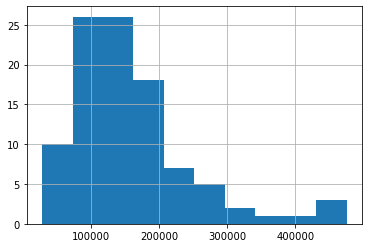

In [184]:
crime.loc[:, 'HousePrice'].hist()

<AxesSubplot:>

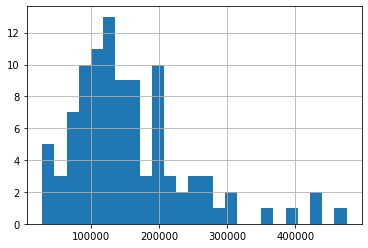

In [185]:
crime['HousePrice'].hist(bins=25)

<AxesSubplot:>

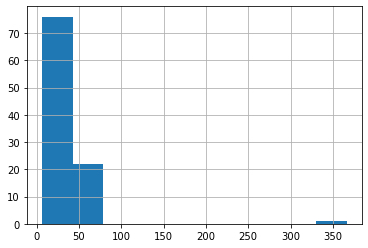

In [186]:
crime.loc[:, 'CrimeRate'].hist()

##### Boxplot

<AxesSubplot:>

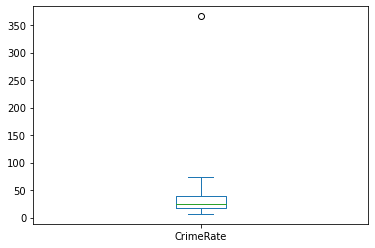

In [187]:
crime.CrimeRate.plot(kind='box')

<AxesSubplot:>

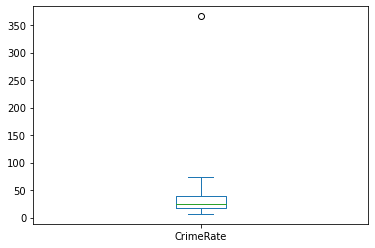

In [188]:
crime.CrimeRate.plot.box()

##### Bar plot

In [189]:
crime.loc[:, "County"].value_counts()

Montgome    29
Delaware    26
Bucks       19
Chester     17
Phila        8
Name: County, dtype: int64

<AxesSubplot:>

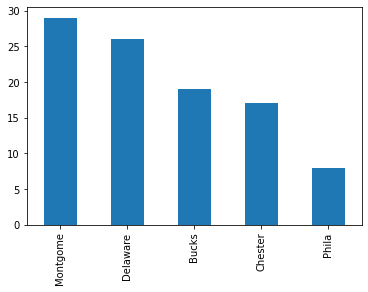

In [190]:
crime.loc[:, "County"].value_counts().plot(kind='bar')

<AxesSubplot:title={'center':'County Dagilimi'}, ylabel='Sayi'>

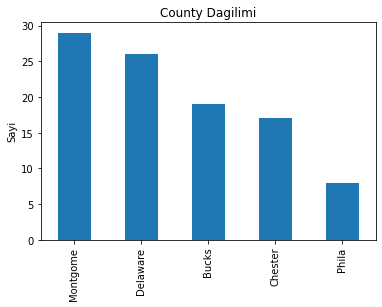

In [191]:
crime.loc[:, "County"].value_counts().plot.bar(title="County Dagilimi", ylabel="Sayi")

##### Scatterplot

In [192]:
crime.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


<AxesSubplot:xlabel='CrimeRate', ylabel='HousePrice'>

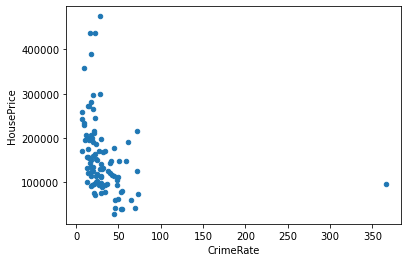

In [193]:
crime.plot(kind='scatter', x="CrimeRate", y="HousePrice")

<AxesSubplot:xlabel='CrimeRate', ylabel='HousePrice'>

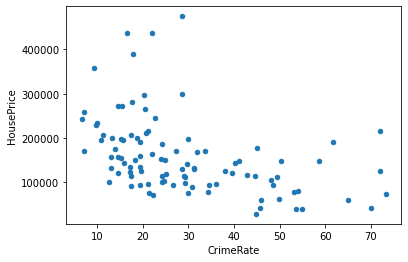

In [194]:
crime_filtered = crime.loc[crime['CrimeRate'] < 300, :]

crime_filtered.plot(kind='scatter', x="CrimeRate", y="HousePrice")

### 7.c Tekrar eden degerler (duplicate)

In [195]:
product_cift = product.loc[[0,1,0,2,3,4,5,6], :].reset_index(drop=True)

In [196]:
product_cift

,CCID,price,cost
0,101,6.99,2.0
1,102,3.99,2.0
2,101,6.99,2.0
3,103,15.00,5.0
4,104,52.39,16.0
5,105,39.99,13.0
6,106,6.00,1.0
7,113,NaN,NaN


In [197]:
product_cift.drop_duplicates()

,CCID,price,cost
0,101,6.99,2.0
1,102,3.99,2.0
3,103,15.00,5.0
4,104,52.39,16.0
5,105,39.99,13.0
6,106,6.00,1.0
7,113,NaN,NaN


In [198]:
product_cift.drop_duplicates(subset=['CCID'])

,CCID,price,cost
0,101,6.99,2.0
1,102,3.99,2.0
3,103,15.00,5.0
4,104,52.39,16.0
5,105,39.99,13.0
6,106,6.00,1.0
7,113,NaN,NaN


In [199]:
df

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
16,17,13,2,19
17,13,0,2,4


In [200]:
df.drop_duplicates(subset=['col3'])

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
16,17,13,2,19


In [201]:
seri

a    9
0    1
1    3
2    4
3    1
4    1
dtype: int32

In [202]:
seri.drop_duplicates()

a    9
0    1
1    3
2    4
dtype: int32

In [203]:
crime['County'].drop_duplicates()

0     Montgome
2     Delaware
3        Bucks
16     Chester
55       Phila
Name: County, dtype: object

In [204]:
crime[    ['County']     ].drop_duplicates()

,County
0,Montgome
2,Delaware
3,Bucks
16,Chester
55,Phila


### 7.d Kayip degerler

In [3]:
boslu = pd.read_csv("bos-degerli.txt")

FileNotFoundError: [Errno 2] No such file or directory: 'bos-degerli.txt'

##### Tespit

In [206]:
crime.isna()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
94,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False


In [207]:
crime.isna().sum(axis=0)

HousePrice         0
HsPrc ($10,000)    0
CrimeRate          0
MilesPhila         0
PopChg             1
Name               0
County             0
dtype: int64

In [208]:
boslu

NameError: name 'boslu' is not defined

In [209]:
boslu.isna()

NameError: name 'boslu' is not defined

In [217]:
boslu.isna().sum()

NameError: name 'boslu' is not defined

In [218]:
##### Doldurma

In [219]:
boslu.fillna(17)

NameError: name 'boslu' is not defined

In [220]:
boslu.fillna('-')

NameError: name 'boslu' is not defined

In [221]:
boslu['b'].fillna(boslu['a'])

NameError: name 'boslu' is not defined

In [222]:
boslu.fillna(method="ffill")

NameError: name 'boslu' is not defined

In [223]:
boslu.fillna(method="ffill", axis=1)

NameError: name 'boslu' is not defined

In [224]:
boslu.fillna(method="bfill")

NameError: name 'boslu' is not defined

In [225]:
boslu.fillna(method="bfill", axis=1)

NameError: name 'boslu' is not defined

## 8. Manipulasyon

### 8.a Islemler

In [229]:
df

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
16,17,13,2,19
17,13,0,2,4


In [230]:
df['col1'] + df['col2']

10    18
11    13
12    30
13    21
16    30
17    13
dtype: int32

In [231]:
df['col1'] ** df['col2']

10           256
11          2048
12   -2139071189
13     815730721
16    1196240593
17             1
dtype: int32

In [232]:
def yarisi(x):
    return x / 2

In [233]:
df['col1'].apply(yarisi)

10    8.0
11    1.0
12    9.5
13    6.5
16    8.5
17    6.5
Name: col1, dtype: float64

In [234]:
df['col1'].apply(lambda x: x/2)

10    8.0
11    1.0
12    9.5
13    6.5
16    8.5
17    6.5
Name: col1, dtype: float64

In [235]:
%%time
(pd.Series([9] * 10_000_000) % 2).head()

Wall time: 2.3 s


0    1
1    1
2    1
3    1
4    1
dtype: int64

In [236]:
%%time
pd.Series([9] * 10_000_000).apply(lambda x: x % 2).head()

Wall time: 5.22 s


0    1
1    1
2    1
3    1
4    1
dtype: int64

In [237]:
crime['County'].head()

0    Montgome
1    Montgome
2    Delaware
3       Bucks
4       Bucks
Name: County, dtype: object

In [238]:
crime['County'].apply(lambda x: x[0] + x[-1])

0     Me
1     Me
2     De
3     Bs
4     Bs
      ..
94    Cr
95    Me
96    Cr
97    Me
98    Bs
Name: County, Length: 99, dtype: object

In [239]:
crime['County'].str[0] + crime['County'].str[-1]

0     Me
1     Me
2     De
3     Bs
4     Bs
      ..
94    Cr
95    Me
96    Cr
97    Me
98    Bs
Name: County, Length: 99, dtype: object

In [240]:
crime['County'].str.replace("M", "U")

0     Uontgome
1     Uontgome
2     Delaware
3        Bucks
4        Bucks
        ...   
94     Chester
95    Uontgome
96     Chester
97    Uontgome
98       Bucks
Name: County, Length: 99, dtype: object

In [241]:
crime['County'].str.extract(r"B(uck)s")

,0
0,NaN
1,NaN
2,NaN
3,uck
4,uck
...,...
94,NaN
95,NaN
96,NaN
97,NaN


### 8.b Kolon/satir ekleme

In [242]:
df

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,19,11,4,19
13,13,8,19,3
16,17,13,2,19
17,13,0,2,4


In [243]:
array[3]

4

In [244]:
array[3] = 9

In [245]:
array

array([9, 1, 3, 9, 1, 1])

In [246]:
df.loc[12, "col1"]

19

In [247]:
df.loc[12, "col1"] = 78

In [248]:
df

,col1,col2,col3,col4
10,16,2,8,3
11,2,11,19,7
12,78,11,4,19
13,13,8,19,3
16,17,13,2,19
17,13,0,2,4


In [249]:
df.loc[[12, 11], "col1"] = [78, 92]

In [250]:
df

,col1,col2,col3,col4
10,16,2,8,3
11,92,11,19,7
12,78,11,4,19
13,13,8,19,3
16,17,13,2,19
17,13,0,2,4


In [251]:
# df.loc[:, "col5"] # KeyError

In [252]:
df.loc[:, "col5"] = [1, 1, 1, 1, 1, 1]

In [253]:
df

,col1,col2,col3,col4,col5
10,16,2,8,3,1
11,92,11,19,7,1
12,78,11,4,19,1
13,13,8,19,3,1
16,17,13,2,19,1
17,13,0,2,4,1


In [254]:
df.loc[:, 'col6'] = pd.Series([8, 4, 1], index=[13, 14, 15])

In [255]:
df['col7'] = pd.Series([1,2], index=[16, 17])

In [256]:
df

,col1,col2,col3,col4,col5,col6,col7
10,16,2,8,3,1,NaN,NaN
11,92,11,19,7,1,NaN,NaN
12,78,11,4,19,1,NaN,NaN
13,13,8,19,3,1,8.0,NaN
16,17,13,2,19,1,NaN,1.0
17,13,0,2,4,1,NaN,2.0


In [257]:
df

,col1,col2,col3,col4,col5,col6,col7
10,16,2,8,3,1,NaN,NaN
11,92,11,19,7,1,NaN,NaN
12,78,11,4,19,1,NaN,NaN
13,13,8,19,3,1,8.0,NaN
16,17,13,2,19,1,NaN,1.0
17,13,0,2,4,1,NaN,2.0


In [258]:
df.loc[:, "toplam"] = df.sum(axis=1)

In [259]:
df

,col1,col2,col3,col4,col5,col6,col7,toplam
10,16,2,8,3,1,NaN,NaN,30.0
11,92,11,19,7,1,NaN,NaN,130.0
12,78,11,4,19,1,NaN,NaN,113.0
13,13,8,19,3,1,8.0,NaN,52.0
16,17,13,2,19,1,NaN,1.0,53.0
17,13,0,2,4,1,NaN,2.0,22.0


In [260]:
df.loc[25, :] = [1, 1, 1, 1, 1, 5, 7, 8]

In [261]:
df

,col1,col2,col3,col4,col5,col6,col7,toplam
10,16.0,2.0,8.0,3.0,1.0,NaN,NaN,30.0
11,92.0,11.0,19.0,7.0,1.0,NaN,NaN,130.0
12,78.0,11.0,4.0,19.0,1.0,NaN,NaN,113.0
13,13.0,8.0,19.0,3.0,1.0,8.0,NaN,52.0
16,17.0,13.0,2.0,19.0,1.0,NaN,1.0,53.0
17,13.0,0.0,2.0,4.0,1.0,NaN,2.0,22.0
25,1.0,1.0,1.0,1.0,1.0,5.0,7.0,8.0


In [262]:
df.loc[30, :] = pd.Series([8, 9], index=['col4', 'col7'])

In [263]:
df

,col1,col2,col3,col4,col5,col6,col7,toplam
10,16.0,2.0,8.0,3.0,1.0,NaN,NaN,30.0
11,92.0,11.0,19.0,7.0,1.0,NaN,NaN,130.0
12,78.0,11.0,4.0,19.0,1.0,NaN,NaN,113.0
13,13.0,8.0,19.0,3.0,1.0,8.0,NaN,52.0
16,17.0,13.0,2.0,19.0,1.0,NaN,1.0,53.0
17,13.0,0.0,2.0,4.0,1.0,NaN,2.0,22.0
25,1.0,1.0,1.0,1.0,1.0,5.0,7.0,8.0
30,NaN,NaN,NaN,8.0,NaN,NaN,9.0,NaN


In [264]:
df.loc['toplam', :] = df.sum(axis=0)

In [265]:
df

,col1,col2,col3,col4,col5,col6,col7,toplam
10,16.0,2.0,8.0,3.0,1.0,NaN,NaN,30.0
11,92.0,11.0,19.0,7.0,1.0,NaN,NaN,130.0
12,78.0,11.0,4.0,19.0,1.0,NaN,NaN,113.0
13,13.0,8.0,19.0,3.0,1.0,8.0,NaN,52.0
16,17.0,13.0,2.0,19.0,1.0,NaN,1.0,53.0
17,13.0,0.0,2.0,4.0,1.0,NaN,2.0,22.0
25,1.0,1.0,1.0,1.0,1.0,5.0,7.0,8.0
30,NaN,NaN,NaN,8.0,NaN,NaN,9.0,NaN
toplam,230.0,46.0,55.0,64.0,7.0,13.0,19.0,408.0


In [266]:
df['a'] = df['col1'] * 3

In [267]:
df

,col1,col2,col3,col4,col5,col6,col7,toplam,a
10,16.0,2.0,8.0,3.0,1.0,NaN,NaN,30.0,48.0
11,92.0,11.0,19.0,7.0,1.0,NaN,NaN,130.0,276.0
12,78.0,11.0,4.0,19.0,1.0,NaN,NaN,113.0,234.0
13,13.0,8.0,19.0,3.0,1.0,8.0,NaN,52.0,39.0
16,17.0,13.0,2.0,19.0,1.0,NaN,1.0,53.0,51.0
17,13.0,0.0,2.0,4.0,1.0,NaN,2.0,22.0,39.0
25,1.0,1.0,1.0,1.0,1.0,5.0,7.0,8.0,3.0
30,NaN,NaN,NaN,8.0,NaN,NaN,9.0,NaN,NaN
toplam,230.0,46.0,55.0,64.0,7.0,13.0,19.0,408.0,690.0


### 8.c Kosullu atama

In [268]:
df

,col1,col2,col3,col4,col5,col6,col7,toplam,a
10,16.0,2.0,8.0,3.0,1.0,NaN,NaN,30.0,48.0
11,92.0,11.0,19.0,7.0,1.0,NaN,NaN,130.0,276.0
12,78.0,11.0,4.0,19.0,1.0,NaN,NaN,113.0,234.0
13,13.0,8.0,19.0,3.0,1.0,8.0,NaN,52.0,39.0
16,17.0,13.0,2.0,19.0,1.0,NaN,1.0,53.0,51.0
17,13.0,0.0,2.0,4.0,1.0,NaN,2.0,22.0,39.0
25,1.0,1.0,1.0,1.0,1.0,5.0,7.0,8.0,3.0
30,NaN,NaN,NaN,8.0,NaN,NaN,9.0,NaN,NaN
toplam,230.0,46.0,55.0,64.0,7.0,13.0,19.0,408.0,690.0


In [269]:
#### col2 <= 20 ise col3 = 5

df.loc[ df['col2'] <= 20,  "col3"  ] = 5

In [270]:
df

,col1,col2,col3,col4,col5,col6,col7,toplam,a
10,16.0,2.0,5.0,3.0,1.0,NaN,NaN,30.0,48.0
11,92.0,11.0,5.0,7.0,1.0,NaN,NaN,130.0,276.0
12,78.0,11.0,5.0,19.0,1.0,NaN,NaN,113.0,234.0
13,13.0,8.0,5.0,3.0,1.0,8.0,NaN,52.0,39.0
16,17.0,13.0,5.0,19.0,1.0,NaN,1.0,53.0,51.0
17,13.0,0.0,5.0,4.0,1.0,NaN,2.0,22.0,39.0
25,1.0,1.0,5.0,1.0,1.0,5.0,7.0,8.0,3.0
30,NaN,NaN,NaN,8.0,NaN,NaN,9.0,NaN,NaN
toplam,230.0,46.0,55.0,64.0,7.0,13.0,19.0,408.0,690.0


In [271]:
#### where

In [272]:
df['col4'] % 2 == 1

10         True
11         True
12         True
13         True
16         True
17        False
25         True
30        False
toplam    False
Name: col4, dtype: bool

In [273]:
df['col1']

10         16.0
11         92.0
12         78.0
13         13.0
16         17.0
17         13.0
25          1.0
30          NaN
toplam    230.0
Name: col1, dtype: float64

In [274]:
#### col4 tek ise col1:=col1, yoksa col1:=2*col1

df.loc[:, "sartli"] = df['col1'].where(df['col4'] % 2 == 1,  df['col1'] * 2)

In [275]:
df

,col1,col2,col3,col4,col5,col6,col7,toplam,a,sartli
10,16.0,2.0,5.0,3.0,1.0,NaN,NaN,30.0,48.0,16.0
11,92.0,11.0,5.0,7.0,1.0,NaN,NaN,130.0,276.0,92.0
12,78.0,11.0,5.0,19.0,1.0,NaN,NaN,113.0,234.0,78.0
13,13.0,8.0,5.0,3.0,1.0,8.0,NaN,52.0,39.0,13.0
16,17.0,13.0,5.0,19.0,1.0,NaN,1.0,53.0,51.0,17.0
17,13.0,0.0,5.0,4.0,1.0,NaN,2.0,22.0,39.0,26.0
25,1.0,1.0,5.0,1.0,1.0,5.0,7.0,8.0,3.0,1.0
30,NaN,NaN,NaN,8.0,NaN,NaN,9.0,NaN,NaN,NaN
toplam,230.0,46.0,55.0,64.0,7.0,13.0,19.0,408.0,690.0,460.0


## 9. Birlestirme

Tablo islemlerinin onemli bir kismini; farkli kaynaklardan/tablolardan gelen verilerin belli kurallar uzerinde birlestirilmesi olusturur.

Ornegin; mallarin birim fiyatlarinin ve satis sayilarinin asagidaki gibi iki ayri tabloda tutuldugunu dusunun:

In [276]:
from IPython.display import Markdown

In [277]:
product = pd.read_sql("SELECT * FROM products", conn)
sales = pd.read_sql("SELECT * FROM sales", conn)

display(Markdown("Urun bilgileri:"))
display(product)
display(Markdown("Satis sayilari:"))
display(sales)

Urun bilgileri:

,CCID,price,cost
0,101,6.99,2.0
1,102,3.99,2.0
2,103,15.00,5.0
3,104,52.39,16.0
4,105,39.99,13.0
5,106,6.00,1.0
6,113,NaN,NaN


Satis sayilari:

,index,CCID,Unit_sold,store
0,1,101,10.0,1
1,2,102,5.0,1
2,3,103,7.0,1
3,4,104,9.0,1
4,5,105,3.0,1
5,6,106,20.0,2
6,7,101,5.0,2
7,8,102,30.0,2
8,9,103,1.0,2
9,10,101,4.0,3


Toplam cironun hesaplanabilmesi icin, her bir satis sayisinin yanina urun numarasi ile eslesen birim fiyatin getirilmesi gerekmektedir.

Iste bunun gibi gereksinimler icin simdi tablo birlestirmeyi gorecegiz.

### 9.a Basit birlestirme: `concat`

Bu bolumde tablolari `np.ndarray`'dekine benzer sekilde basit yanyana/alt alta koyma islemlerini inceleyecegiz.

##### Alt alta koyma

Ayni semaya sahip farkli tablolari birlestirmek icin bu teknigi uygulayacagiz. Asagida farkli iki urune ait ayni semada iki ayri dataframe bulunmaktadir. Bunlari birlestirelim:

In [278]:
urun1 = pd.DataFrame({'gun': [0, 1, 2, 3], 'urun_no': [1] * 4, 'satis_sayisi': [9, 27, 1, 5]})
urun2 = pd.DataFrame({'gun': [0, 1, 2, 3], 'urun_no': [2] * 4, 'satis_sayisi': [3, 10, 8, 7]})

display(urun1)
display(urun2)

,gun,urun_no,satis_sayisi
0,0,1,9
1,1,1,27
2,2,1,1
3,3,1,5


,gun,urun_no,satis_sayisi
0,0,2,3
1,1,2,10
2,2,2,8
3,3,2,7


In [279]:
pd.concat([
    urun1,
    urun2
], axis=0)

,gun,urun_no,satis_sayisi
0,0,1,9
1,1,1,27
2,2,1,1
3,3,1,5
0,0,2,3
1,1,2,10
2,2,2,8
3,3,2,7


In [280]:
pd.concat([
    urun1,
    urun2
], axis=0, keys=['urun1', 'urun2'])

gun  urun_no  satis_sayisi
urun1 0    0        1             9
      1    1        1            27
      2    2        1             1
      3    3        1             5
urun2 0    0        2             3
      1    1        2            10
      2    2        2             8
      3    3        2             7

In [281]:
pd.concat([
    urun1,
    urun2
], axis=0, ignore_index=True)

,gun,urun_no,satis_sayisi
0,0,1,9
1,1,1,27
2,2,1,1
3,3,1,5
4,0,2,3
5,1,2,10
6,2,2,8
7,3,2,7


Semalarin farkli olmasi durumunda neler olur? (numpy'da birlesme gerceklesmiyordu)

In [282]:
display(urun1.assign(sicaklik=[20, 21, 21, 24]))
display(urun2)

,gun,urun_no,satis_sayisi,sicaklik
0,0,1,9,20
1,1,1,27,21
2,2,1,1,21
3,3,1,5,24


,gun,urun_no,satis_sayisi
0,0,2,3
1,1,2,10
2,2,2,8
3,3,2,7


In [283]:
pd.concat([
    urun1.assign(sicaklik=[20, 21, 21, 24]),
    urun2
],
    axis=0
)

,gun,urun_no,satis_sayisi,sicaklik
0,0,1,9,20.0
1,1,1,27,21.0
2,2,1,1,21.0
3,3,1,5,24.0
0,0,2,3,NaN
1,1,2,10,NaN
2,2,2,8,NaN
3,3,2,7,NaN


##### Yan yana koyma

Ayni orneklerin farkli ozelliklerini iceren tablolari birlestirmek icin bu teknigi uygulayacagiz. Asagida ayni urune ait farkli ozelliklerin tutuldugu iki ayri dataframe bulunmaktadir. Bunlari birlestirelim:

In [284]:
satislar = pd.Series([40, 12, 34, 31, 30, 28, 16, 20, 40, 49, 56])

In [285]:
satislar

0     40
1     12
2     34
3     31
4     30
5     28
6     16
7     20
8     40
9     49
10    56
dtype: int64

In [286]:
pd.concat([satislar.shift(i) for i in range(0, 4)], axis=1).add_prefix('lag')

,lag0,lag1,lag2,lag3
0,40,NaN,NaN,NaN
1,12,40.0,NaN,NaN
2,34,12.0,40.0,NaN
3,31,34.0,12.0,40.0
4,30,31.0,34.0,12.0
5,28,30.0,31.0,34.0
6,16,28.0,30.0,31.0
7,20,16.0,28.0,30.0
8,40,20.0,16.0,28.0
9,49,40.0,20.0,16.0


In [287]:
pd.concat([satislar.shift(-i) for i in range(0, 4)], axis=1).add_prefix('lead')

,lead0,lead1,lead2,lead3
0,40,12.0,34.0,31.0
1,12,34.0,31.0,30.0
2,34,31.0,30.0,28.0
3,31,30.0,28.0,16.0
4,30,28.0,16.0,20.0
5,28,16.0,20.0,40.0
6,16,20.0,40.0,49.0
7,20,40.0,49.0,56.0
8,40,49.0,56.0,NaN
9,49,56.0,NaN,NaN


In [288]:
satislar_gecikmeli = pd.DataFrame()
satislar_gelecek = pd.DataFrame()

for i in range(1,4):
    satislar_gecikmeli.loc[:, f"lag{i}"] = satislar.shift(i)

for i in range(0, 3):
    satislar_gelecek.loc[:, f"lead{i}"] = satislar.shift(-i)

display(satislar_gecikmeli)
display(satislar_gelecek)

,lag1,lag2,lag3
0,NaN,NaN,NaN
1,40.0,NaN,NaN
2,12.0,40.0,NaN
3,34.0,12.0,40.0
4,31.0,34.0,12.0
5,30.0,31.0,34.0
6,28.0,30.0,31.0
7,16.0,28.0,30.0
8,20.0,16.0,28.0
9,40.0,20.0,16.0


,lead0,lead1,lead2
0,40,12.0,34.0
1,12,34.0,31.0
2,34,31.0,30.0
3,31,30.0,28.0
4,30,28.0,16.0
5,28,16.0,20.0
6,16,20.0,40.0
7,20,40.0,49.0
8,40,49.0,56.0
9,49,56.0,NaN


Onceki gunlerin satislarina bakarak sonraki gunler hakkinda fikir edinmeye calistigimizi dusunelim. 

Satir indisleri burada gun hukmunde olup, `lag` kolonlari bulunulan gunden onceki gunlerin satislarini, `lead` kolonlari ise sonraki gunlerin satislarini gostermektedir.

Analizimide, `lag` ve `lead` kolonlarini her bir gun icin yan yana gormek istedigimizde, bu dataframe'leri yan yana birlestirme ihtiyaci dogacaktir:

In [289]:
pd.concat([satislar_gecikmeli, satislar_gelecek], axis=1)

,lag1,lag2,lag3,lead0,lead1,lead2
0,NaN,NaN,NaN,40,12.0,34.0
1,40.0,NaN,NaN,12,34.0,31.0
2,12.0,40.0,NaN,34,31.0,30.0
3,34.0,12.0,40.0,31,30.0,28.0
4,31.0,34.0,12.0,30,28.0,16.0
5,30.0,31.0,34.0,28,16.0,20.0
6,28.0,30.0,31.0,16,20.0,40.0
7,16.0,28.0,30.0,20,40.0,49.0
8,20.0,16.0,28.0,40,49.0,56.0
9,40.0,20.0,16.0,49,56.0,NaN


In [290]:
pd.concat([satislar_gecikmeli, satislar_gelecek], axis=1, keys=['gecikme', 'gelecek'])

gecikme             gelecek            
      lag1  lag2  lag3   lead0 lead1 lead2
0      NaN   NaN   NaN      40  12.0  34.0
1     40.0   NaN   NaN      12  34.0  31.0
2     12.0  40.0   NaN      34  31.0  30.0
3     34.0  12.0  40.0      31  30.0  28.0
4     31.0  34.0  12.0      30  28.0  16.0
5     30.0  31.0  34.0      28  16.0  20.0
6     28.0  30.0  31.0      16  20.0  40.0
7     16.0  28.0  30.0      20  40.0  49.0
8     20.0  16.0  28.0      40  49.0  56.0
9     40.0  20.0  16.0      49  56.0   NaN
10    49.0  40.0  20.0      56   NaN   NaN

Uyusan satir indekslerinin nasil birlestirildigine dikkat ediniz. Birbirinden bagimsiz indekslere sahip tablolari birlestirdiginizde uygunsuz sonuclar alacaginizi unutmayiniz.

**Birlestirmede baz alinan husus satirlarin sirasi degil indeks isimleridir.**

In [291]:
sol = pd.DataFrame({"a": [1,9]})
sag = pd.DataFrame({"b": ["Semih", "Eko"]}, index=['k1', 'k2'])

pd.concat([sol, sag], axis=1)

,a,b
0,1.0,NaN
1,9.0,NaN
k1,NaN,Semih
k2,NaN,Eko


### 9.b Anahtar bazli birlestirme: `join`/`merge`

Cogu zaman, birlestirmek istedigimiz tablolar ayni semaya sahip ya da ayni indeks isimlerine sahip olmayip, aksine birbirleriyle bir unique-foreign key yapisi uzerinden baglidirlar.

In [292]:
product = pd.read_sql("SELECT * FROM products", conn)
sales = pd.read_sql("SELECT * FROM sales", conn)

In [293]:
display(product)
display(sales)

,CCID,price,cost
0,101,6.99,2.0
1,102,3.99,2.0
2,103,15.00,5.0
3,104,52.39,16.0
4,105,39.99,13.0
5,106,6.00,1.0
6,113,NaN,NaN


,index,CCID,Unit_sold,store
0,1,101,10.0,1
1,2,102,5.0,1
2,3,103,7.0,1
3,4,104,9.0,1
4,5,105,3.0,1
5,6,106,20.0,2
6,7,101,5.0,2
7,8,102,30.0,2
8,9,103,1.0,2
9,10,101,4.0,3


#### 9.b.I Inner join

In [294]:
sales_product = product.merge(sales, how='inner', on=['CCID'])
sales_product

,CCID,price,cost,index,Unit_sold,store
0,101,6.99,2.0,1,10.0,1
1,101,6.99,2.0,7,5.0,2
2,101,6.99,2.0,10,4.0,3
3,102,3.99,2.0,2,5.0,1
4,102,3.99,2.0,8,30.0,2
5,103,15.00,5.0,3,7.0,1
6,103,15.00,5.0,9,1.0,2
7,103,15.00,5.0,11,3.0,3
8,104,52.39,16.0,4,9.0,1
9,105,39.99,13.0,5,3.0,1


In [295]:
sales_product.assign(ciro=lambda x: x['price'] * x['Unit_sold'])['ciro'].sum()

1388.88

#### 9.b.II Left/Right Outer Join

In [296]:
left = pd.DataFrame({'a': ["Toyota", "Honda"], "b": [3, 4]})
right = pd.DataFrame({'a': ['Toyota', 'Ford'], "hiz": [90, 110]})

In [297]:
left

,a,b
0,Toyota,3
1,Honda,4


In [298]:
right

,a,hiz
0,Toyota,90
1,Ford,110


In [299]:
left.merge(right, on=['a'], how='inner')

,a,b,hiz
0,Toyota,3,90


In [300]:
left.merge(right, on=['a'], how='left')

,a,b,hiz
0,Toyota,3,90.0
1,Honda,4,NaN


In [301]:
left.merge(right, on=['a'], how='right')

,a,b,hiz
0,Toyota,3.0,90
1,Ford,NaN,110


#### 9.b.III Full Outer Join

In [302]:
left.merge(right, on=['a'], how='outer')

,a,b,hiz
0,Toyota,3.0,90.0
1,Honda,4.0,NaN
2,Ford,NaN,110.0


Ayni olmayan kolon isimleri

In [303]:
left = pd.DataFrame({'araba': ["Toyota", "Honda"], "b": [3, 4]})
right = pd.DataFrame({'a': ['Toyota', 'Ford'], "hiz": [90, 110]})

In [304]:
left.merge(right, left_on=['araba'], right_on=['a'], how='inner')

,araba,b,a,hiz
0,Toyota,3,Toyota,90


Cok kolon

In [305]:
left = pd.DataFrame({
    "CCID": [1,2,3,4,1,2,3,4],
    "StoreID": [1,1,1,1,2,2,2,2],
    "Inventory": [67, 12, 12, 34, 23, 23, 23, 67]
})

right = pd.DataFrame({
    "CCID": [1,2,3,4, 1, 2, 3],
    "StoreID": [1,1,1,1,2,2,2],
    "Sales": [67, 12, 12, 23, 34, 56, 56,]
})

In [306]:
left

,CCID,StoreID,Inventory
0,1,1,67
1,2,1,12
2,3,1,12
3,4,1,34
4,1,2,23
5,2,2,23
6,3,2,23
7,4,2,67


In [307]:
right

,CCID,StoreID,Sales
0,1,1,67
1,2,1,12
2,3,1,12
3,4,1,23
4,1,2,34
5,2,2,56
6,3,2,56


In [308]:
# Inv: hafta basinda envanter
# sales: hafta boyunca toplam satis
# Amac: hafta sonunda kalan envanteri hesaplamak istiyoruz

left.merge(right, on=['CCID', "StoreID"])

,CCID,StoreID,Inventory,Sales
0,1,1,67,67
1,2,1,12,12
2,3,1,12,12
3,4,1,34,23
4,1,2,23,34
5,2,2,23,56
6,3,2,23,56


In [309]:
left.merge(right, on=['CCID', 'StoreID'], how='outer').fillna(0).assign(EOW_Inv=lambda x: x['Inventory'] - x['Sales'])

,CCID,StoreID,Inventory,Sales,EOW_Inv
0,1,1,67,67.0,0.0
1,2,1,12,12.0,0.0
2,3,1,12,12.0,0.0
3,4,1,34,23.0,11.0
4,1,2,23,34.0,-11.0
5,2,2,23,56.0,-33.0
6,3,2,23,56.0,-33.0
7,4,2,67,0.0,67.0


## 10. Gruplama

In [310]:
crime

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks
...,...,...,...,...,...,...,...
94,174232,17.4232,13.8,25.0,4.7,Westtown,Chester
95,196515,19.6515,29.9,16.0,1.8,Whitemarsh,Montgome
96,232714,23.2714,9.9,21.0,0.2,Willistown,Chester
97,245920,24.5920,22.6,10.0,0.3,Wynnewood,Montgome


In [311]:
for county in crime['County'].drop_duplicates():
    print(county, crime.loc[crime['County'] == county, 'HousePrice'].mean())

Montgome 191156.6551724138
Delaware 136962.92307692306
Bucks 163961.31578947368
Chester 175404.76470588235
Phila 53000.0


In [312]:
for county in crime['County'].drop_duplicates():
    print(county, crime.set_index('County').loc[county, 'HousePrice'].mean())

Montgome 191156.6551724138
Delaware 136962.92307692306
Bucks 163961.31578947368
Chester 175404.76470588235
Phila 53000.0


### 10.a Standart ozetleme fonksiyonlari

```python
dataframe \
    .groupby( [grupkol1, grupkol2, ...]  # kendisine gore gruplanacak kolonlar
            ) \
    [ [degerkol1, degerkol2, ....]  # ozetlenecek kolonlar
            ] \
    .agg( func  ) # ozetleme fonksiyonu

```

In [313]:
# County'lere gore ev fiyati ve suc orani ortalamasi


crime \
    .groupby( ["County"]  # kendisine gore gruplanacak kolonlar
            ) \
    [ ["HousePrice", "CrimeRate"]  # ozetlenecek kolonlar
            ] \
    .agg("mean") # ozetleme fonksiyonu

,HousePrice,CrimeRate
County,,
Bucks,163961.315789,24.515789
Chester,175404.764706,30.382353
Delaware,136962.923077,24.792308
Montgome,191156.655172,29.251724
Phila,53000.000000,93.737500


In [314]:
# County'lere gore nufus artis azami orani


crime \
    .groupby( ["County"]  # kendisine gore gruplanacak kolonlar
            ) \
    [ ["PopChg"]  # ozetlenecek kolonlar
            ] \
    .agg("max") # ozetleme fonksiyonu

,PopChg
County,
Bucks,23.1
Chester,14.6
Delaware,12.9
Montgome,26.9
Phila,4.8


### 10.b Ozellestirilmis grup fonksiyonlari

In [315]:
siradanikincieleman(pd.Series([1,2,4,71,1,-1,10]))

1

In [316]:
# County'lere gore nufus artis azami orani


crime \
    .groupby( ["County"]  # kendisine gore gruplanacak kolonlar
            ) \
    [ ["PopChg"]  # ozetlenecek kolonlar
            ] \
    .agg( siradanikincieleman  ) # ozetleme fonksiyonu

,PopChg
County,
Bucks,0.6
Chester,2.3
Delaware,-2.9
Montgome,-2.1
Phila,-6.4


In [317]:
# County'lere gore nufus artis azami orani


crime \
    .groupby( ["County"]  # kendisine gore gruplanacak kolonlar
            ) \
    [ ["PopChg"]  # ozetlenecek kolonlar
            ] \
    .agg( lambda x: set(x)  ) # ozetleme fonksiyonu

,PopChg
County,
Bucks,"{0.6000000000000001, 1.9, 2.7, 3.9, 4.2, 1.3, ..."
Chester,"{0.2, 1.1, 2.3, 2.9, 4.6, 5.8, 6.9, 6.4, 6.3, ..."
Delaware,"{0.0, 1.6, 0.2, -0.7000000000000001, -0.4, 0.9..."
Montgome,"{0.6000000000000001, nan, 2.4, 1.5, 4.0, 5.2, ..."
Phila,"{4.8, -5.7, -9.2, -8.4, -6.4, -5.1, -4.9, -1.4}"


,PopChg
County,
Bucks,"AxesSubplot(0.125,0.125;0.775x0.755)"
Chester,"AxesSubplot(0.125,0.125;0.775x0.755)"
Delaware,"AxesSubplot(0.125,0.125;0.775x0.755)"
Montgome,"AxesSubplot(0.125,0.125;0.775x0.755)"
Phila,"AxesSubplot(0.125,0.125;0.775x0.755)"


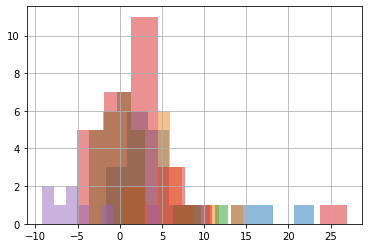

In [318]:
# County'lere gore nufus artis azami orani


crime \
    .groupby( ["County"]  # kendisine gore gruplanacak kolonlar
            ) \
    [ ["PopChg"]  # ozetlenecek kolonlar
            ] \
    .agg( lambda x: x.hist(alpha=0.5)  ) # ozetleme fonksiyonu

In [319]:
crime.groupby('County').agg(  {"PopChg": "min",  "HousePrice": "max"}   )

,PopChg,HousePrice
County,,
Bucks,-1.6,359112
Chester,0.2,280969
Delaware,-3.7,436348
Montgome,-5.1,475112
Phila,-9.2,96200


In [320]:
crime.groupby(['County']).agg(  {"PopChg": "min",  "HousePrice": ["max", "median"]}   )

PopChg HousePrice          
            min        max    median
County                              
Bucks      -1.6     359112  143072.0
Chester     0.2     280969  170556.0
Delaware   -3.7     436348  108470.5
Montgome   -5.1     475112  157446.0
Phila      -9.2      96200   51000.0

In [321]:
crime.groupby(['County']).agg(  {"PopChg": "min",  "HousePrice": ["max", "median"]}   ).loc[:, ("PopChg", "min")]

County
Bucks      -1.6
Chester     0.2
Delaware   -3.7
Montgome   -5.1
Phila      -9.2
Name: (PopChg, min), dtype: float64

In [322]:
crime.groupby(['County']).agg(
        
            hs_prc_max= pd.NamedAgg("HousePrice", np.max),
            hs_prc_median=pd.NamedAgg("HousePrice", np.median),
)

,hs_prc_max,hs_prc_median
County,,
Bucks,359112,143072.0
Chester,280969,170556.0
Delaware,436348,108470.5
Montgome,475112,157446.0
Phila,96200,51000.0


### 10.c Pencere fonksiyonlari

In [323]:
satislar

0     40
1     12
2     34
3     31
4     30
5     28
6     16
7     20
8     40
9     49
10    56
dtype: int64

In [324]:
satislar.cumsum()

0      40
1      52
2      86
3     117
4     147
5     175
6     191
7     211
8     251
9     300
10    356
dtype: int64

In [325]:
np.random.seed(8)
satis_dukkan = pd.DataFrame(dict(satislar=satislar, dukkan=np.random.randint(0,2,size=11)))

In [326]:
satis_dukkan.groupby(['dukkan'])['satislar'].mean()

dukkan
0    30.4
1    34.0
Name: satislar, dtype: float64

In [327]:
satis_dukkan.groupby(['dukkan'])['satislar'].sum()

dukkan
0    152
1    204
Name: satislar, dtype: int64

In [328]:
satis_dukkan.assign(dukkan_cumsum=satis_dukkan.groupby(['dukkan'])['satislar'].cumsum())

,satislar,dukkan,dukkan_cumsum
0,40,1,40
1,12,0,12
2,34,1,74
3,31,1,105
4,30,1,135
5,28,0,40
6,16,0,56
7,20,1,155
8,40,0,96
9,49,1,204


##### transform

In [329]:
sales.groupby('store')['Unit_sold'].mean() # store uzerinden join yap, oranlari hesapla ...

store
1     6.800000
2    14.000000
3     4.333333
Name: Unit_sold, dtype: float64

In [330]:
sales.groupby('store')['Unit_sold'].mean().reset_index().merge(sales, on=['store'])

,store,Unit_sold_x,index,CCID,Unit_sold_y
0,1,6.800000,1,101,10.0
1,1,6.800000,2,102,5.0
2,1,6.800000,3,103,7.0
3,1,6.800000,4,104,9.0
4,1,6.800000,5,105,3.0
5,2,14.000000,6,106,20.0
6,2,14.000000,7,101,5.0
7,2,14.000000,8,102,30.0
8,2,14.000000,9,103,1.0
9,3,4.333333,10,101,4.0


In [331]:
sales.groupby('store')['Unit_sold'].transform('mean')

0      6.800000
1      6.800000
2      6.800000
3      6.800000
4      6.800000
5     14.000000
6     14.000000
7     14.000000
8     14.000000
9      4.333333
10     4.333333
11     4.333333
12     4.333333
Name: Unit_sold, dtype: float64

In [332]:
sales.join(sales.groupby('store')['Unit_sold'].transform('mean').rename("mean_sales")) \
    .assign(sls_ratio=lambda x: x['Unit_sold'] / x['mean_sales'])

,index,CCID,Unit_sold,store,mean_sales,sls_ratio
0,1,101,10.0,1,6.800000,1.470588
1,2,102,5.0,1,6.800000,0.735294
2,3,103,7.0,1,6.800000,1.029412
3,4,104,9.0,1,6.800000,1.323529
4,5,105,3.0,1,6.800000,0.441176
5,6,106,20.0,2,14.000000,1.428571
6,7,101,5.0,2,14.000000,0.357143
7,8,102,30.0,2,14.000000,2.142857
8,9,103,1.0,2,14.000000,0.071429
9,10,101,4.0,3,4.333333,0.923077


In [333]:
sales \
    .assign(mean_sales=sales.groupby('store')['Unit_sold'].transform('mean')) \
    .assign(sls_ratio=lambda x: x['Unit_sold'] / x['mean_sales'])

,index,CCID,Unit_sold,store,mean_sales,sls_ratio
0,1,101,10.0,1,6.800000,1.470588
1,2,102,5.0,1,6.800000,0.735294
2,3,103,7.0,1,6.800000,1.029412
3,4,104,9.0,1,6.800000,1.323529
4,5,105,3.0,1,6.800000,0.441176
5,6,106,20.0,2,14.000000,1.428571
6,7,101,5.0,2,14.000000,0.357143
7,8,102,30.0,2,14.000000,2.142857
8,9,103,1.0,2,14.000000,0.071429
9,10,101,4.0,3,4.333333,0.923077


## 11. Pivot ve eritme

### 11.a Pivot tablosu ile ozetleme

In [334]:
sales.pivot_table(index=['CCID'], columns=['store'], values=['Unit_sold'], aggfunc='sum')

Unit_sold           
store         1     2    3
CCID                      
101        10.0   5.0  4.0
102         5.0  30.0  NaN
103         7.0   1.0  3.0
104         9.0   NaN  NaN
105         3.0   NaN  6.0
106         NaN  20.0  NaN
113         NaN   NaN  0.0

In [335]:
sales

,index,CCID,Unit_sold,store
0,1,101,10.0,1
1,2,102,5.0,1
2,3,103,7.0,1
3,4,104,9.0,1
4,5,105,3.0,1
5,6,106,20.0,2
6,7,101,5.0,2
7,8,102,30.0,2
8,9,103,1.0,2
9,10,101,4.0,3


In [336]:
coklu_pivot = sales.pivot_table(
    index=['CCID'], 
    columns=['store'], 
    values=['Unit_sold'], 
    aggfunc=['sum', "mean"],
    margins=True,

)

In [337]:
coklu_pivot

sum                         mean                           
      Unit_sold                    Unit_sold                           
store         1     2     3    All         1     2         3        All
CCID                                                                   
101        10.0   5.0   4.0   19.0      10.0   5.0  4.000000   6.333333
102         5.0  30.0   NaN   35.0       5.0  30.0       NaN  17.500000
103         7.0   1.0   3.0   11.0       7.0   1.0  3.000000   3.666667
104         9.0   NaN   NaN    9.0       9.0   NaN       NaN   9.000000
105         3.0   NaN   6.0    9.0       3.0   NaN  6.000000   4.500000
106         NaN  20.0   NaN   20.0       NaN  20.0       NaN  20.000000
113         NaN   NaN   0.0    NaN       NaN   NaN       NaN        NaN
All        34.0  56.0  13.0  103.0       6.8  14.0  4.333333   8.583333

### 11.b Pivot halindeki tabloyu eritme: `melt`

In [338]:
coklu_pivot.reset_index().melt(id_vars=['CCID']).dropna(subset=['value'])

,CCID,variable_0,variable_1,variable_2,value
0,101,sum,Unit_sold,1,10.000000
1,102,sum,Unit_sold,1,5.000000
2,103,sum,Unit_sold,1,7.000000
3,104,sum,Unit_sold,1,9.000000
4,105,sum,Unit_sold,1,3.000000
7,All,sum,Unit_sold,1,34.000000
8,101,sum,Unit_sold,2,5.000000
9,102,sum,Unit_sold,2,30.000000
10,103,sum,Unit_sold,2,1.000000
13,106,sum,Unit_sold,2,20.000000


## 12. Zaman serisi islemleri (timeseries)

In [339]:
kohort = pd.read_csv("kohort.txt", sep="|", header=None)

### 12.a `datetime` veri tipi

In [340]:
kohort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       822 non-null    object
 1   1       822 non-null    object
dtypes: object(2)
memory usage: 13.0+ KB


In [341]:
kohort.head()

,0,1
0,"[5/5/22, 6:58:57 AM]",Data Science Cohort VIII
1,"[5/5/22, 12:45:51 PM]",K02
2,"[5/5/22, 12:50:42 PM]",K03
3,"[5/5/22, 12:51:36 PM]",K02
4,"[5/5/22, 12:52:02 PM]",K04


In [342]:
kohort.loc[:, "tsg"] = pd.to_datetime(kohort.loc[:, 0], format="[%m/%d/%y, %I:%M:%S %p]")

In [343]:
kohort.head()

,0,1,tsg
0,"[5/5/22, 6:58:57 AM]",Data Science Cohort VIII,2022-05-05 06:58:57
1,"[5/5/22, 12:45:51 PM]",K02,2022-05-05 12:45:51
2,"[5/5/22, 12:50:42 PM]",K03,2022-05-05 12:50:42
3,"[5/5/22, 12:51:36 PM]",K02,2022-05-05 12:51:36
4,"[5/5/22, 12:52:02 PM]",K04,2022-05-05 12:52:02


In [344]:
kohort.drop(0, axis=1, inplace=True)

In [345]:
kohort.head()

,1,tsg
0,Data Science Cohort VIII,2022-05-05 06:58:57
1,K02,2022-05-05 12:45:51
2,K03,2022-05-05 12:50:42
3,K02,2022-05-05 12:51:36
4,K04,2022-05-05 12:52:02


In [346]:
kohort.rename({1: "k_id"}, axis=1, inplace=True)

In [347]:
kohort.head()

,k_id,tsg
0,Data Science Cohort VIII,2022-05-05 06:58:57
1,K02,2022-05-05 12:45:51
2,K03,2022-05-05 12:50:42
3,K02,2022-05-05 12:51:36
4,K04,2022-05-05 12:52:02


In [348]:
kohort.dtypes

k_id            object
tsg     datetime64[ns]
dtype: object

### 12.c Yeniden ornekleme: `resample`

In [349]:
kohort = kohort.set_index('tsg')

In [350]:
kohort.head()

,k_id
tsg,
2022-05-05 06:58:57,Data Science Cohort VIII
2022-05-05 12:45:51,K02
2022-05-05 12:50:42,K03
2022-05-05 12:51:36,K02
2022-05-05 12:52:02,K04


In [351]:
kohort.resample("H")['k_id'].count()

tsg
2022-05-05 06:00:00     1
2022-05-05 07:00:00     0
2022-05-05 08:00:00     0
2022-05-05 09:00:00     0
2022-05-05 10:00:00     0
                       ..
2022-06-17 08:00:00     0
2022-06-17 09:00:00     0
2022-06-17 10:00:00     0
2022-06-17 11:00:00     5
2022-06-17 12:00:00    14
Freq: H, Name: k_id, Length: 1039, dtype: int64

In [352]:
kohort.resample("D")['k_id'].count().head()

tsg
2022-05-05    35
2022-05-06     0
2022-05-07    23
2022-05-08    18
2022-05-09     0
Freq: D, Name: k_id, dtype: int64

<AxesSubplot:xlabel='tsg'>

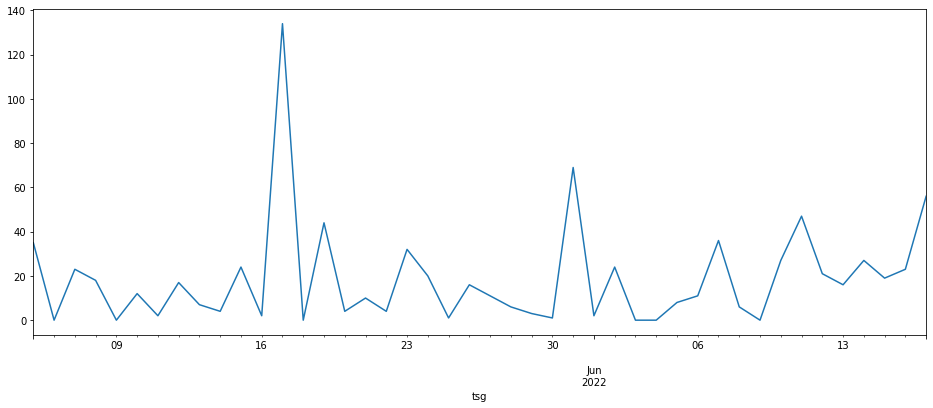

In [353]:
kohort.resample("D")['k_id'].count().plot(figsize=(16, 6))

<AxesSubplot:xlabel='tsg'>

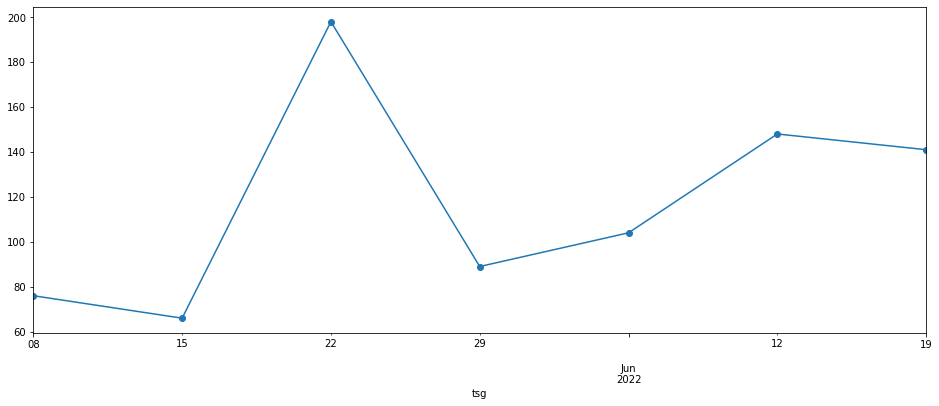

In [354]:
kohort.resample("W")['k_id'].count().plot(figsize=(16, 6), marker='o')

### 12.b Pencere fonksiyonlari: `rolling`

In [355]:
import matplotlib.pyplot as plt

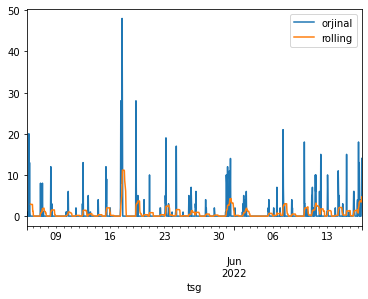

In [356]:
kohort.resample("H")['k_id'].count().plot(label='orjinal')
kohort.resample("H")['k_id'].count().rolling(12).mean().plot(label='rolling')
plt.legend()

<AxesSubplot:>

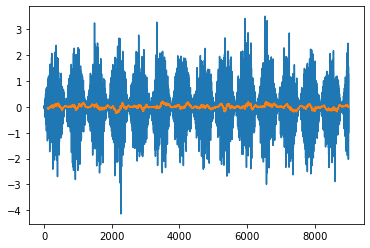

In [357]:
a = np.random.randn(9000) * np.sin(np.arange(9000)/200)
pd.Series(a).plot()
pd.Series(a).rolling(100).mean().plot()


### 12.d Bosluk doldurma

In [358]:
gunluk_kl = kohort.reset_index().groupby(
    [pd.Grouper(key='tsg', freq='D'), "k_id"])['k_id'].count().rename("mesaj_sayisi").reset_index() \
    .pivot_table(index='tsg', columns='k_id', values='mesaj_sayisi', aggfunc="sum")

In [359]:
gunluk_kl

k_id,Data Science Cohort VIII,K01,K02,K03,K04,K05,K06,K07,K08,K09,K10,K11,K12,K13,K14,K15,K16,K17,K18
tsg,,,,,,,,,,,,,,,,,,,
2022-05-05,1.0,3.0,3.0,7.0,7.0,5.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-07,NaN,NaN,1.0,5.0,2.0,7.0,NaN,1.0,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN
2022-05-08,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,9.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,2.0
2022-05-10,NaN,NaN,NaN,2.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,5.0,1.0,NaN,NaN,NaN
2022-05-11,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1.0,1.0,6.0,NaN,7.0,NaN,NaN,NaN
2022-05-13,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2022-05-14,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2022-05-15,NaN,NaN,NaN,NaN,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3.0,5.0,NaN,11.0,NaN,NaN,NaN


In [360]:
eksiksiz_index = pd.date_range(gunluk_kl.index.min(), gunluk_kl.index.max(), freq=gunluk_kl.index.freq)

In [361]:
eksiksiz_index

DatetimeIndex(['2022-05-05', '2022-05-06', '2022-05-07', '2022-05-08',
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-14', '2022-05-15', '2022-05-16',
               '2022-05-17', '2022-05-18', '2022-05-19', '2022-05-20',
               '2022-05-21', '2022-05-22', '2022-05-23', '2022-05-24',
               '2022-05-25', '2022-05-26', '2022-05-27', '2022-05-28',
               '2022-05-29', '2022-05-30', '2022-05-31', '2022-06-01',
               '2022-06-02', '2022-06-03', '2022-06-04', '2022-06-05',
               '2022-06-06', '2022-06-07', '2022-06-08', '2022-06-09',
               '2022-06-10', '2022-06-11', '2022-06-12', '2022-06-13',
               '2022-06-14', '2022-06-15', '2022-06-16', '2022-06-17'],
              dtype='datetime64[ns]', freq='D')

In [362]:
gunluk_kl_temiz = gunluk_kl.reindex(eksiksiz_index).fillna(0).astype(np.uint16)

In [364]:
gunluk_kl_temiz.head()

k_id,Data Science Cohort VIII,K01,K02,K03,K04,K05,K06,K07,K08,K09,K10,K11,K12,K13,K14,K15,K16,K17,K18
2022-05-05,1,3,3,7,7,5,2,2,1,1,1,1,1,0,0,0,0,0,0
2022-05-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2022-05-07,0,0,1,5,2,7,0,1,0,0,1,2,2,0,0,0,2,0,0
2022-05-08,0,0,0,3,0,2,0,0,0,0,9,0,1,1,0,0,0,0,2
2022-05-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

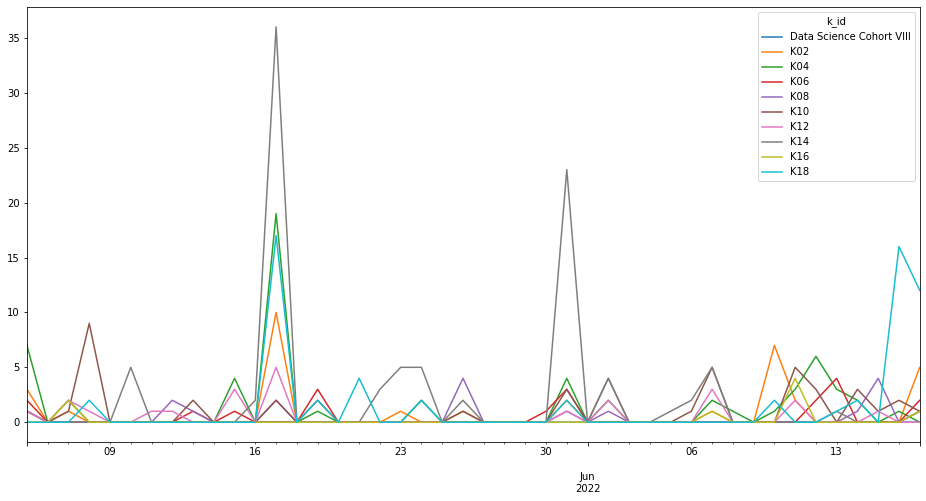

In [365]:
gunluk_kl_temiz.iloc[:,::2].plot(figsize=(16, 8))

In [367]:
muhabbet = kohort.reset_index().assign(next_tsg=lambda x: x['tsg'].shift(-1)) \
    .assign(fark=lambda x: x['next_tsg'] - x['tsg']) \
    .loc[ lambda x: x['fark'] >= pd.Timedelta('12H') ] \
    .loc[:, 'k_id'] \
    .value_counts()

<AxesSubplot:title={'center':'En cok muhabbet oldurenler'}>

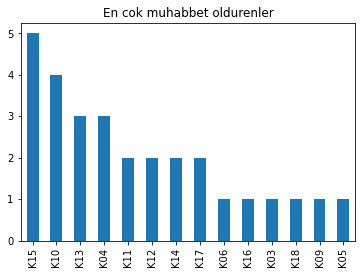

In [368]:
muhabbet \
    .plot.bar(title="En cok muhabbet oldurenler")

## 13. Coklu indeks ile secim ve dilimleme

In [369]:
idx = pd.IndexSlice

In [370]:
sales.loc[
    idx[2:8:2], 
    idx[['Unit_sold', 'store']]
    ]

,Unit_sold,store
2,7.0,1
4,3.0,1
6,5.0,2
8,1.0,2


In [371]:
coklu_pivot = sales.pivot_table(index=['CCID'], columns=['store'], values=['Unit_sold'], aggfunc='sum')

In [372]:
coklu_pivot.loc[102:104, ('Unit_sold', [2,3])]

Unit_sold     
store         2    3
CCID                
102        30.0  NaN
103         1.0  3.0
104         NaN  NaN

In [373]:
coklu_pivot.loc[idx[102:104], idx[:, [2,3]]]

Unit_sold     
store         2    3
CCID                
102        30.0  NaN
103         1.0  3.0
104         NaN  NaN

## 14. Veriyi diske/veritabanina yazma

In [ ]:
muhabbet.to_csv("muhabbet.csv")

In [ ]:
muhabbet.to_pickle("muhabbet.pickle")